
--- Eligibility Summary ---
Medicaid: Eligible for Medicaid for members: [5]
CHIP: Eligible for CHIP for members: [5]
Marketplace: Not eligible for marketplace coverage. Consider Medicaid.
Medicare: Not eligible for Medicare.

--- Eligibility Advice ---
1. You may apply for Medicaid for additional health coverage.
2. Your children may qualify for CHIP for their healthcare needs.
3. You are not eligible for the marketplace. Consider exploring other health insurance options or private plans.

--- Visit Outcome ---
Routine check-up provided. No immediate concerns.

--- Care Coordination ---
{'care_coordination': 'Scheduled routine check-up, specialty: general.'}

--- Provider Incentives ---
{'provider_id': 2, 'location': 'rural', 'specialty': 'general', 'incentive': 'Bonus for working in rural area and providing primary care + High patient satisfaction bonus'}

--- Provider Credentialing Updates ---
{'provider_id': 2, 'status': 'Compliant - No action required.'}

--- Claims Status ---
{'

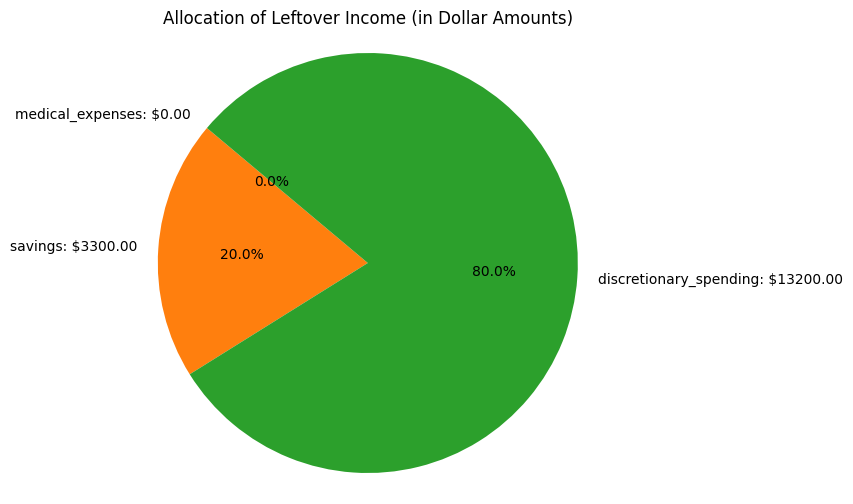

In [68]:
import random
import matplotlib.pyplot as plt

# Health Insurance Eligibility Class
class HealthInsuranceEligibility:
    def __init__(self, income, family_size, ages, state, citizenship_status, residency_status, medical_necessity, disability, expenses):
        self.income = income
        self.family_size = family_size
        self.ages = ages
        self.state = state
        self.citizenship_status = citizenship_status
        self.residency_status = residency_status
        self.medical_necessity = medical_necessity
        self.disability = disability
        self.expenses = expenses
        self.fpl = self.get_federal_poverty_level()
        self.state_specific_thresholds = self.get_state_thresholds()

    def get_federal_poverty_level(self):
        fpl_2024 = {
            1: 13800,
            2: 18600,
            3: 23400,
            4: 28200,
            5: 33000,
            6: 37800,
        }
        if self.family_size > 6:
            additional_amount = (fpl_2024[6] - fpl_2024[5]) / (6 - 5)
            fpl_2024[self.family_size] = fpl_2024[6] + additional_amount * (self.family_size - 6)
        
        return fpl_2024.get(self.family_size)

    def get_state_thresholds(self):
        thresholds = {
            "Texas": {"medicaid": 138, "chip": 300},
            "California": {"medicaid": 138, "chip": 250}
        }
        return thresholds.get(self.state, {"medicaid": 138, "chip": 300})

    def is_citizen_or_resident(self):
        return self.citizenship_status == "U.S. citizen" and self.residency_status == "State resident"

    def calculate_remaining_income(self):
        passive_expenses = self.expenses.get("passive", 0)
        active_expenses = self.expenses.get("active", 0)
        remaining_income = self.income - (passive_expenses + active_expenses)
        return remaining_income

    def check_medicaid_eligibility(self):
        if not self.is_citizen_or_resident():
            return "Not eligible for Medicaid: Must be a U.S. citizen and state resident."
        if self.income < (self.fpl * self.state_specific_thresholds["medicaid"] / 100):
            eligible_members = [age for age in self.ages if age < 19 or age >= 65 or self.disability[self.ages.index(age)]]
            return f"Eligible for Medicaid for members: {eligible_members}" if eligible_members else "Not eligible for Medicaid."
        return "Not eligible for Medicaid."

    def check_chip_eligibility(self):
        if self.income < (self.fpl * self.state_specific_thresholds["chip"] / 100):
            eligible_members = [age for age in self.ages if age < 19]  
            return f"Eligible for CHIP for members: {eligible_members}" if eligible_members else "Not eligible for CHIP."
        return "Not eligible for CHIP."

    def check_marketplace_eligibility(self):
        # Exclude individuals who are eligible for Medicare
        eligible_for_medicare = self.check_medicare_eligibility() != "Not eligible for Medicare."
        if eligible_for_medicare:
            return "Not eligible for Marketplace coverage. Eligible for Medicare."

        if self.income < (self.fpl * 100 / 100):
            return "Not eligible for marketplace coverage. Consider Medicaid."
        elif self.income <= (self.fpl * 400 / 100):
            eligible_members = [age for age in self.ages if age >= 18]
            return f"Eligible for marketplace coverage with potential premium tax credits for members: {eligible_members}"
        else:
            return "Eligible for marketplace coverage but may not qualify for premium tax credits."

    def check_medicare_eligibility(self):
        eligible_members = []
        for i, age in enumerate(self.ages):
            if age >= 65 or (self.disability[i] and age < 65):
                eligible_members.append(age)
        return f"Eligible for Medicare for members: {eligible_members}" if eligible_members else "Not eligible for Medicare."

    def eligibility_summary(self):
        medicaid_status = self.check_medicaid_eligibility()
        chip_status = self.check_chip_eligibility()
        marketplace_status = self.check_marketplace_eligibility()
        medicare_status = self.check_medicare_eligibility()

        return {
            "Medicaid": medicaid_status,
            "CHIP": chip_status,
            "Marketplace": marketplace_status,
            "Medicare": medicare_status,
        }

    def advice_based_on_eligibility(self):
        eligibility_summary = self.eligibility_summary()
        advice = []
        
        # Medicaid Advice
        if "Eligible" in eligibility_summary["Medicaid"]:
            advice.append("1. You may apply for Medicaid for additional health coverage.")
        elif "Not eligible" in eligibility_summary["Medicaid"]:
            advice.append("1. You are not eligible for Medicaid. Consider alternative coverage options.")
        
        # CHIP Advice
        if "Eligible" in eligibility_summary["CHIP"]:
            advice.append("2. Your children may qualify for CHIP for their healthcare needs.")
        
        # Marketplace Advice - Exclude marketplace advice for those eligible for Medicare
        if "Eligible" in eligibility_summary["Marketplace"]:
            advice.append("3. Consider enrolling in a marketplace plan to lower your healthcare costs with premium tax credits.")
        elif "Not eligible" in eligibility_summary["Marketplace"]:
            # Check if someone is eligible for Medicare before giving marketplace advice
            if "Eligible" not in eligibility_summary["Medicare"]:
                advice.append("3. You are not eligible for the marketplace. Consider exploring other health insurance options or private plans.")
        
        # Medicare Advice
        if "Eligible" in eligibility_summary["Medicare"]:
            advice.append("4. You or your family member may be eligible for Medicare. Make sure to apply and get coverage for healthcare needs.")
        
        # Advice if not eligible for Medicaid or CHIP
        if "Not eligible" in eligibility_summary["Medicaid"] and "Not eligible" in eligibility_summary["CHIP"]:
            advice.append("5. You may explore private insurance options or marketplace plans.")
        
        return "\n".join(advice) if advice else "No specific advice at this time."


    def determine_service_type(self):
        if self.medical_necessity:
            return "urgent"
        else:
            return "routine"
    def calculate_allocations(self, eligibility_summary, medical_necessity, payment_plan, leftover_income):
        
        allocations = {
            "medical_expenses": 0,
            "savings": 0,
            "discretionary_spending": 0
        }
        
        # If eligible for Medicaid or Medicare
        if "Eligible" in eligibility_summary.get("Medicaid", "") or "Eligible" in eligibility_summary.get("Medicare", ""):
            # If eligible for Medicaid/Medicare, medical expenses are covered, allocate remaining income.
            allocations["medical_expenses"] = 0
            allocations["savings"] = leftover_income * 0.20  # 20% of leftover income goes to savings
            allocations["discretionary_spending"] = leftover_income * 0.80  # 80% goes to discretionary spending
        else:
            if medical_necessity:
                # For urgent care with upfront payment
                allocations["medical_expenses"] = leftover_income * 0.50  # Allocate 50% to medical expenses
                allocations["savings"] = leftover_income * 0.10  # Allocate 10% to savings
                allocations["discretionary_spending"] = leftover_income * 0.40  # Allocate 40% to discretionary spending
            else:
                # For routine care with flexible payment plan
                if payment_plan == "Flexible payment plan available for routine services.":
                    allocations["medical_expenses"] = leftover_income * 0.30  # Allocate 30% to medical expenses
                    allocations["savings"] = leftover_income * 0.30  # Allocate 30% to savings
                    allocations["discretionary_spending"] = leftover_income * 0.40  # Allocate 40% to discretionary spending
                else:
                    # Urgent care without flexible payment plan
                    allocations["medical_expenses"] = leftover_income * 0.50  # Allocate 50% to medical expenses
                    allocations["savings"] = leftover_income * 0.10  # Allocate 10% to savings
                    allocations["discretionary_spending"] = leftover_income * 0.40  # Allocate 40% to discretionary spending
        
        return allocations


    import matplotlib.pyplot as plt

    def visualize_allocations(self, leftover_income, allocations):
        # Get the actual dollar amounts of each allocation
        actual_allocations = {key: value for key, value in allocations.items()}
        
        # Prepare labels with actual dollar amounts
        labels = [f"{key}: ${value:.2f}" for key, value in actual_allocations.items()]
        
        # Pie chart size values (actual dollar amounts)
        sizes = actual_allocations.values()
    
        # Plotting the pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title('Allocation of Leftover Income (in Dollar Amounts)')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()





# Stakeholders in the Patient Journey
class HomewardHealth:
    def __init__(self, visit_data):
        self.visit_data = visit_data

    def send_visit_data(self, medical_necessity):
        return {"patient_id": self.visit_data['patient_id'], "telehealth": True, "visit_type": "urgent" if medical_necessity else "routine"}

    def simulate_visit_outcome(self, visit_type):
        if visit_type == 'urgent':
            return "Urgent care provided. Follow-up with primary care scheduled."
        elif visit_type == 'routine':
            return "Routine check-up provided. No immediate concerns."
        return "Emergency care provided at private facility. Full payment required upfront."


class MainStreetHealth:
    def __init__(self, visit_data):
        self.visit_data = visit_data

    def coordinate_care(self):
        visit_type = self.visit_data.get('visit_type', 'routine')
        specialty = self.determine_specialty_based_on_care(visit_type)
        if visit_type == 'urgent' and specialty == 'specialist':
            return {"care_coordination": f"Urgent care with specialist scheduled at local hospital, specialty: {specialty}."}
        elif visit_type == 'urgent':
            return {"care_coordination": f"Emergency care scheduled at local hospital, specialty: {specialty}."}
        elif specialty == 'specialist':
            return {"care_coordination": f"Scheduled telehealth appointment with a local specialist, specialty: {specialty}."}
        return {"care_coordination": f"Scheduled routine check-up, specialty: {specialty}."}

    def determine_specialty_based_on_care(self, visit_type):
        if visit_type == "urgent":
            return "specialist"  # Urgent care often involves specialists
        return "general"  # Routine care typically doesn't need a specialist


class LilianCare:
    def __init__(self, provider_data):
        self.provider_data = provider_data

    def evaluate_provider_incentives(self):
        incentives = []
        for provider in self.provider_data:
            incentive = {"provider_id": provider["id"], "location": provider["location"], "specialty": provider["specialty"]}

            # Location-based incentive logic
            if provider["location"] == "rural":
                incentive["incentive"] = "Bonus for working in rural area and providing primary care"
            elif provider["location"] == "urban" and provider["specialty"] == "specialist":
                incentive["incentive"] = "Performance-based incentive for urban specialist"
            elif provider["location"] == "suburban":
                incentive["incentive"] = "Standard incentive for suburban providers"
            else:
                incentive["incentive"] = "Standard incentive"
            
            # Additional experience and patient satisfaction bonuses
            if provider["experience"] > 7:
                incentive["incentive"] += " + Experience-based bonus"
            if provider["patient_satisfaction"] > 4.5:
                incentive["incentive"] += " + High patient satisfaction bonus"

            incentives.append(incentive)
        
        return incentives


class ProCredEx:
    def __init__(self, provider_data):
        self.provider_data = provider_data

    def update_provider_credentialing(self, provider_incentives):
        updates = []
        for provider in provider_incentives:
            status = "Compliant - No action required." if provider["provider_id"] % 2 == 0 else "Non-compliant - Credential review pending."
            updates.append({"provider_id": provider["provider_id"], "status": status})
        return updates


class HiHealth:
    def __init__(self, claim_data, eligibility_checker):
        self.claim_data = claim_data
        self.eligibility_checker = eligibility_checker

    def process_claims(self):
        claims_status = []
        for claim in self.claim_data:
            claim_info = {
                "patient_id": claim["patient_id"],
                "status": "Approved" if self.eligibility_checker.medical_necessity else "Pending",
                "claim_type": "urgent" if self.eligibility_checker.medical_necessity else "routine"
            }

            # Adding partial coverage and additional charges for urgent care
            if self.eligibility_checker.medical_necessity:
                claim_info["coverage"] = "Partial coverage, additional charges apply for urgent care."
            else:
                claim_info["coverage"] = "Full coverage for routine care."

            claims_status.append(claim_info)
        return claims_status

    def manage_payment_plan(self):
        # Check if Medicaid or Medicare eligibility is present
        if "Eligible" in self.eligibility_checker.eligibility_summary().get("Medicaid", ""):
            return {"payment_plan": "Medicaid covers the full cost of the visit. No out-of-pocket payment required for routine care."}
        elif self.eligibility_checker.medical_necessity:
            return {"payment_plan": "Full upfront payment required for urgent services."}
        else:
            return {"payment_plan": "Flexible payment plan available for routine services."}

        if "Eligible" in self.eligibility_checker.eligibility_summary().get("Medicare", ""):
            return {"payment_plan": "Medicare covers the full cost of the visit. No out-of-pocket payment required for routine care."}
        elif self.eligibility_checker.medical_necessity:
            return {"payment_plan": "Full upfront payment required for urgent services."}
        else:
            return {"payment_plan": "Flexible payment plan available for routine services."}


# Example Input Data
income = 18000
family_size = 2
ages = [30, 5]
state = "Texas"
citizenship = "U.S. citizen"
residency = "State resident"
medical_necessity = False  # Routine check-up
disability = [False, False]  # No disability in the household
expenses = {"passive": 500, "active": 1000}
location = "rural"  # This could be "urban", "rural", or "suburban"

# Create Eligibility Object
eligibility_checker = HealthInsuranceEligibility(
    income, 
    family_size, 
    ages, 
    state, 
    citizenship, 
    residency, 
    medical_necessity, 
    disability, 
    expenses
)

# Stakeholder Outputs
homeward_health = HomewardHealth({"patient_id": 101, "medical_necessity": eligibility_checker.medical_necessity})
visit_outcome = homeward_health.simulate_visit_outcome(homeward_health.send_visit_data(eligibility_checker.medical_necessity)["visit_type"])

mainstreet_health = MainStreetHealth(visit_data={"visit_type": eligibility_checker.determine_service_type()})
care_coordination = mainstreet_health.coordinate_care()

lilian_care = LilianCare(provider_data=[{"id": 2, "location": location, "specialty": mainstreet_health.determine_specialty_based_on_care(eligibility_checker.determine_service_type()), "experience": 5, "patient_satisfaction": 4.6}])
provider_incentives = lilian_care.evaluate_provider_incentives()

procredex = ProCredEx(provider_data=[{"id": 2, "location": location, "specialty": mainstreet_health.determine_specialty_based_on_care(eligibility_checker.determine_service_type()), "experience": 5, "patient_satisfaction": 4.6}])
credentialing_updates = procredex.update_provider_credentialing(provider_incentives)

hi_health = HiHealth(claim_data=[{"patient_id": 101}], eligibility_checker=eligibility_checker)
claims_status = hi_health.process_claims()

# Print Outputs
print("\n--- Eligibility Summary ---")
for key, value in eligibility_checker.eligibility_summary().items():
    print(f"{key}: {value}")

print("\n--- Eligibility Advice ---")
print(eligibility_checker.advice_based_on_eligibility())

print("\n--- Visit Outcome ---")
print(visit_outcome)

print("\n--- Care Coordination ---")
print(care_coordination)

print("\n--- Provider Incentives ---")
for incentive in provider_incentives:
    print(incentive)

print("\n--- Provider Credentialing Updates ---")
for update in credentialing_updates:
    print(update)

print("\n--- Claims Status ---")
for claim in claims_status:
    print(claim)

print("\n--- Payment Plan ---")
print(hi_health.manage_payment_plan())

# Calculate the leftover income
leftover_income = eligibility_checker.calculate_remaining_income()

# Determine if medical necessity and payment plan are present
payment_plan = hi_health.manage_payment_plan()["payment_plan"]
allocations = eligibility_checker.calculate_allocations(
    eligibility_checker.eligibility_summary(),
    eligibility_checker.medical_necessity,
    payment_plan,
    leftover_income
)

# Visualize the allocations
eligibility_checker.visualize_allocations(leftover_income, allocations)
